In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Athletes.csv')
df.sample(5)

,Bib,Zip,Age,Age Group,Gender,First Half,Second Half,Finish,Positive Split,Percent Change
17166,26051,2149,52,50-54,M,9760,12347,22107,2587,0.265061
16269,25207,77546,44,40-44,F,8449,11357,19806,2908,0.344183
12614,21603,60657,55,55-59,F,7455,8289,15744,834,0.111871
5894,13288,94583,50,50-54,M,5958,6523,12481,565,0.094830
14523,28266,2116,25,Under 35,F,7933,9501,17434,1568,0.197655


In [3]:
df.shape

(17220, 10)

In [4]:
df.isnull().sum()

Bib               0
Zip               0
Age               0
Age Group         0
Gender            0
First Half        0
Second Half       0
Finish            0
Positive Split    0
Percent Change    0
dtype: int64

In [5]:
df.duplicated().sum()

0

- The dataset doesn't contain any duplicate values or null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17220 entries, 0 to 17219
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bib             17220 non-null  int64  
 1   Zip             17220 non-null  int64  
 2   Age             17220 non-null  int64  
 3   Age Group       17220 non-null  object 
 4   Gender          17220 non-null  object 
 5   First Half      17220 non-null  int64  
 6   Second Half     17220 non-null  int64  
 7   Finish          17220 non-null  int64  
 8   Positive Split  17220 non-null  int64  
 9   Percent Change  17220 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 1.3+ MB


- We can drop the age group column since it doesn't have any use

In [7]:
df.drop(columns=['Age Group'],inplace=True)

- We have categorical data so we convert them using Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [9]:
df.head(1)

,Bib,Zip,Age,Gender,First Half,Second Half,Finish,Positive Split,Percent Change
0,25,93730,30,1,3832,3961,7793,129,0.033664


### Finding correlation between the feature helps to predict the age of an athelete

In [10]:
correlation_matrix = df.corr()

In [11]:
correlation_matrix

,Bib,Zip,Age,Gender,First Half,Second Half,Finish,Positive Split,Percent Change
Bib,1.000000,-0.260689,0.205467,-0.342244,0.811329,0.720919,0.781434,0.282885,0.104125
Zip,-0.260689,1.000000,0.139000,0.015515,-0.225849,-0.213430,-0.225190,-0.104180,-0.054281
Age,0.205467,0.139000,1.000000,0.126719,0.237932,0.234699,0.243159,0.129406,0.070819
Gender,-0.342244,0.015515,0.126719,1.000000,-0.294834,-0.167899,-0.227421,0.084897,0.150295
First Half,0.811329,-0.225849,0.237932,-0.294834,1.000000,0.881389,0.958840,0.334352,0.114495
Second Half,0.720919,-0.213430,0.234699,-0.167899,0.881389,1.000000,0.979245,0.739898,0.563033
Finish,0.781434,-0.225190,0.243159,-0.227421,0.958840,0.979245,1.000000,0.588195,0.387554
Positive Split,0.282885,-0.104180,0.129406,0.084897,0.334352,0.739898,0.588195,1.000000,0.960237
Percent Change,0.104125,-0.054281,0.070819,0.150295,0.114495,0.563033,0.387554,0.960237,1.000000


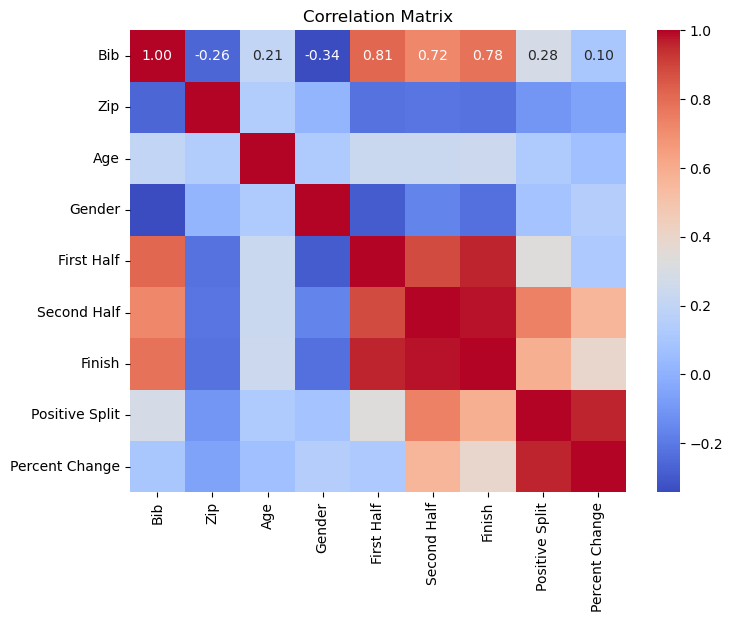

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
correlation_with_age=correlation_matrix['Age']

In [14]:
correlation_with_age=correlation_with_age.to_dict()

In [15]:
correlation_df = pd.DataFrame(list(correlation_with_age.items()), columns=['Feature', 'Correlation with Age'])

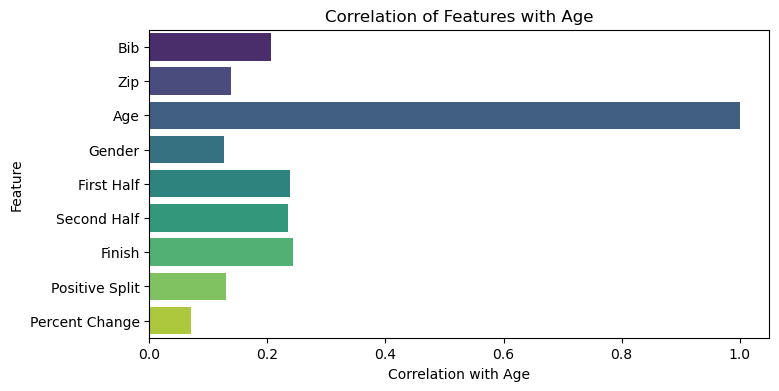

In [16]:
plt.figure(figsize=(8, 4))
sns.barplot(data=correlation_df, x='Correlation with Age', y='Feature', palette='viridis')
plt.title('Correlation of Features with Age')
plt.show()

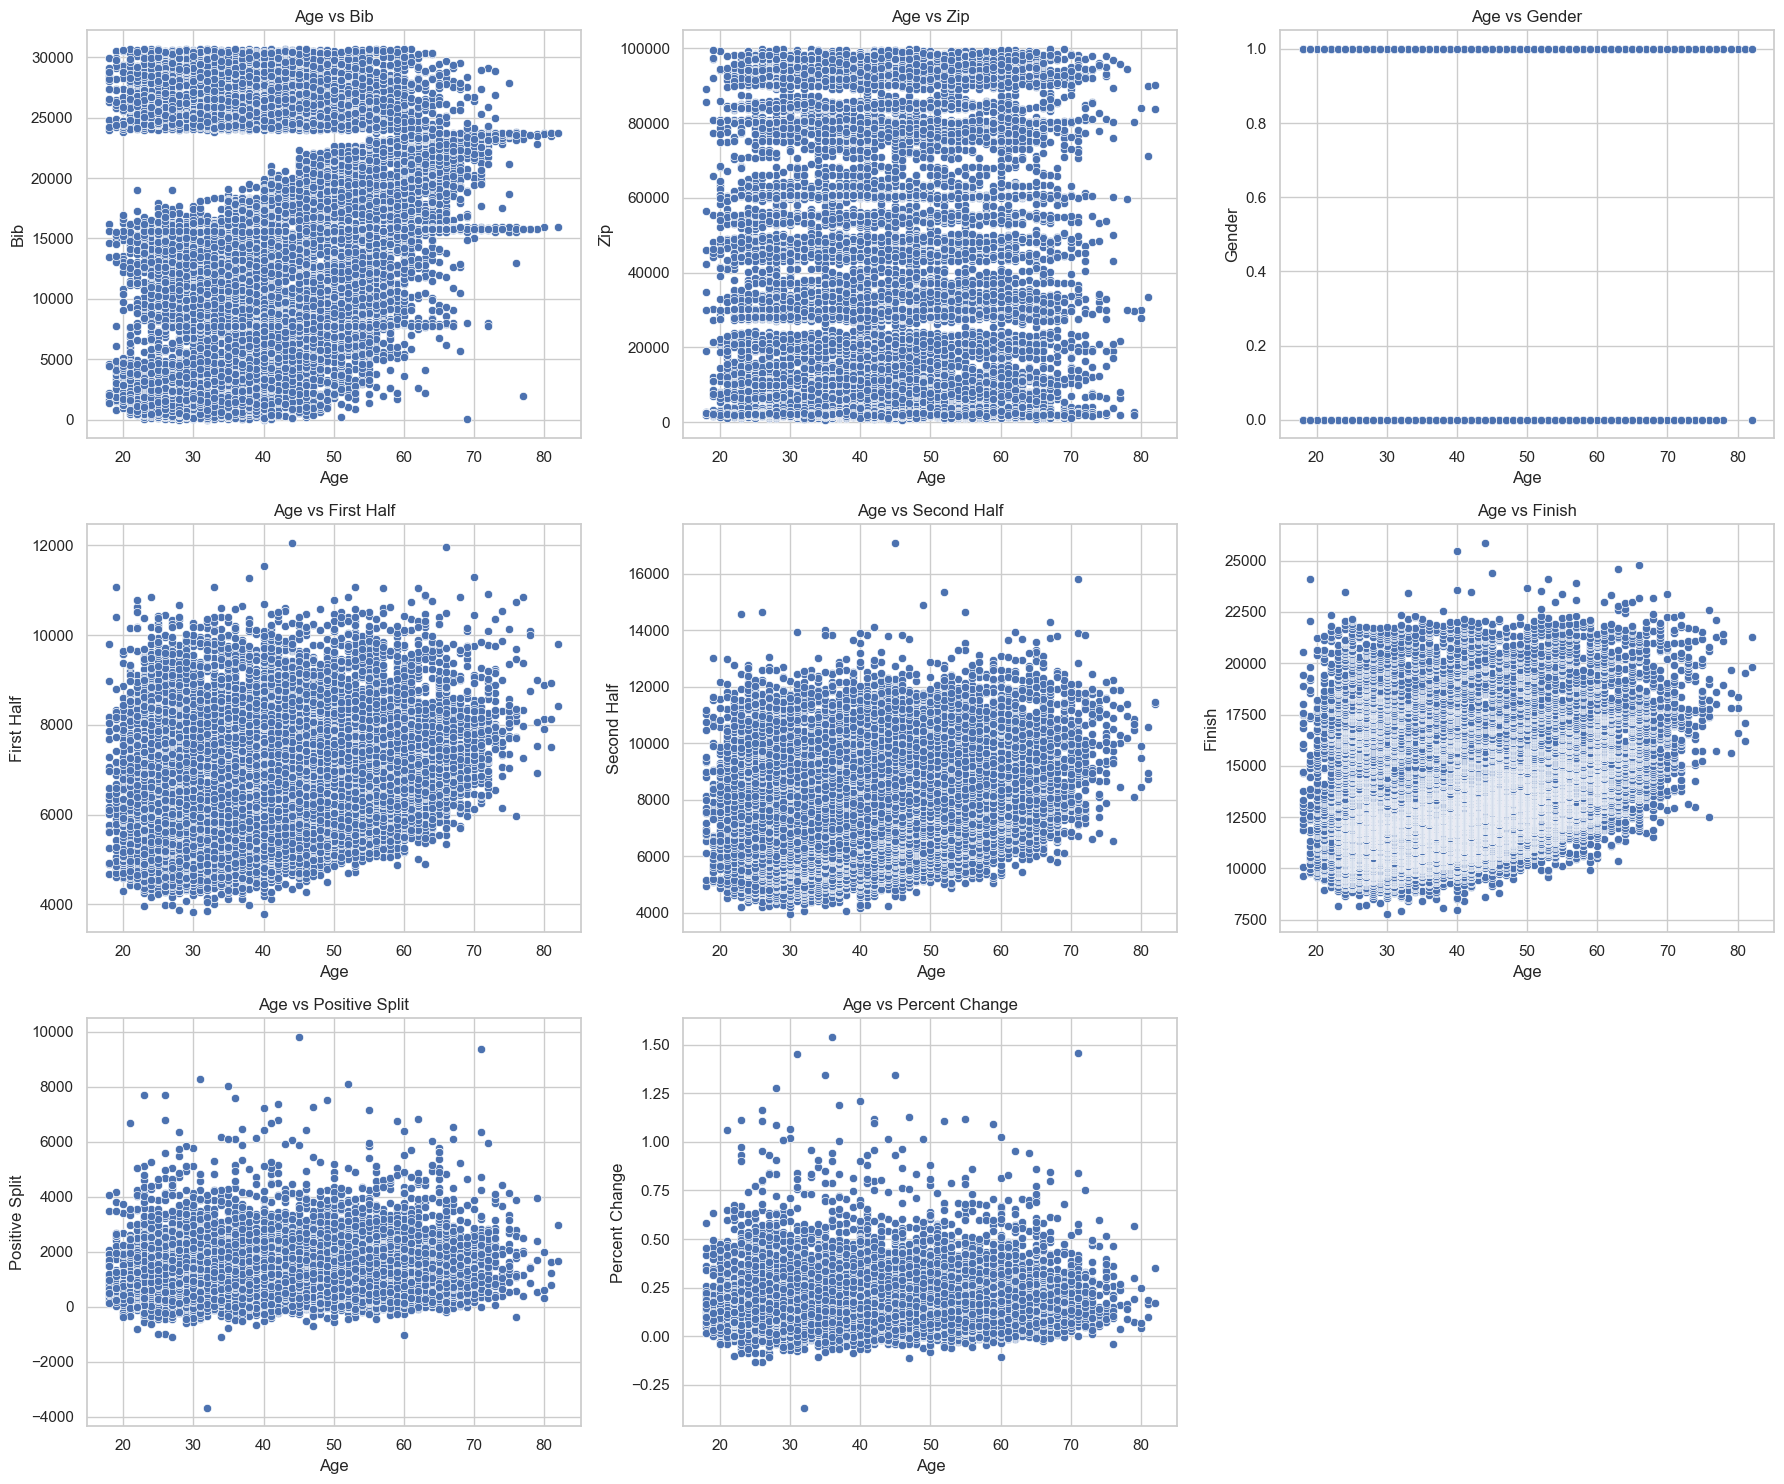

In [17]:
sns.set(style="whitegrid")

# Creating scatter plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Plotting Age vs Bib
sns.scatterplot(ax=axes[0, 0], data=df, x='Age', y='Bib')
axes[0, 0].set_title('Age vs Bib')

# Plotting Age vs Zip
sns.scatterplot(ax=axes[0, 1], data=df, x='Age', y='Zip')
axes[0, 1].set_title('Age vs Zip')

# Plotting Age vs Gender
sns.scatterplot(ax=axes[0, 2], data=df, x='Age', y='Gender')
axes[0, 2].set_title('Age vs Gender')

# Plotting Age vs First Half
sns.scatterplot(ax=axes[1, 0], data=df, x='Age', y='First Half')
axes[1, 0].set_title('Age vs First Half')

# Plotting Age vs Second Half
sns.scatterplot(ax=axes[1, 1], data=df, x='Age', y='Second Half')
axes[1, 1].set_title('Age vs Second Half')

# Plotting Age vs Finish
sns.scatterplot(ax=axes[1, 2], data=df, x='Age', y='Finish')
axes[1, 2].set_title('Age vs Finish')

# Plotting Age vs Positive Split
sns.scatterplot(ax=axes[2, 0], data=df, x='Age', y='Positive Split')
axes[2, 0].set_title('Age vs Positive Split')

# Plotting Age vs Percent Change
sns.scatterplot(ax=axes[2, 1], data=df, x='Age', y='Percent Change')
axes[2, 1].set_title('Age vs Percent Change')

# Removing the last empty subplot
fig.delaxes(axes[2, 2])

plt.tight_layout()
plt.show()

In [18]:
df.head(1)

,Bib,Zip,Age,Gender,First Half,Second Half,Finish,Positive Split,Percent Change
0,25,93730,30,1,3832,3961,7793,129,0.033664


In [19]:
X=df.drop(columns='Age')
y=df['Age']

In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104,  test_size=0.25,  shuffle=True) 

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=120,random_state=20)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=120, random_state=20)

In [32]:
y_pred=regressor.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

score = r2_score(y_test, y_pred)

print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)
print("R-squared Error:",score)

Mean Absolute Error: 5.717549361207897
Root Mean Squared Error: 7.634273002329683
R-squared Error: 0.6350654068939987


- From the decision tree we got an exceptional accuracy of 100